In [ ]:
# BIBLIOTECA
# !pip install kmodes

In [1]:
# bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes

In [4]:
data = np.array([['x', 'y', 'z'],
                 ['y', 'z', 'x'],
                 ['z', 'x', 'x'],
                 ['y', 'z', 'z'],
                 ['x', 'z', 'y'],
                 ['z', 'y', 'x'],
                 ['x', 'x', 'y'],
                 ['z', 'y', 'x']])
# modelo con 2 grupos
# n_init Number of time the k-modes algorithm will be run with different
#        centroid seeds. The final results will be the best output of
#        n_init consecutive runs in terms of cost
km = KModes(n_clusters=2, init='random',n_init=5,verbose=0)
grupos = km.fit_predict(data)
grupos, km.cluster_centroids_

(array([0, 0, 1, 0, 0, 1, 0, 1], dtype=uint16),
 array([['x', 'z', 'y'],
        ['z', 'y', 'x']], dtype='<U1'))

In [6]:
# datos
col_cabello = np.array(['rubio', 'castaño', 'pelirrojo', 'negro', 'castaño', 'negro', 'pelirrojo', 'rubio'])
col_ojos = np.array(['azul', 'gris', 'verde', 'café', 'azul', 'gris', 'azul', 'café'])
tipo_cabello = np.array(['lacio', 'chino', 'ondulado', 'ondulado', 'chino', 'chino', 'ondulado', 'lacio'])
personas = ['P1','P2','P3','P4','P5','P6','P7','P8']
data = pd.DataFrame({'person':personas, 'col_cabello':col_cabello, 'col_ojos':col_ojos, 'tipo_cabello':tipo_cabello})
data = data.set_index('person')
data

,col_cabello,col_ojos,tipo_cabello
person,,,
P1,rubio,azul,lacio
P2,castaño,gris,chino
P3,pelirrojo,verde,ondulado
P4,negro,café,ondulado
P5,castaño,azul,chino
P6,negro,gris,chino
P7,pelirrojo,azul,ondulado
P8,rubio,café,lacio


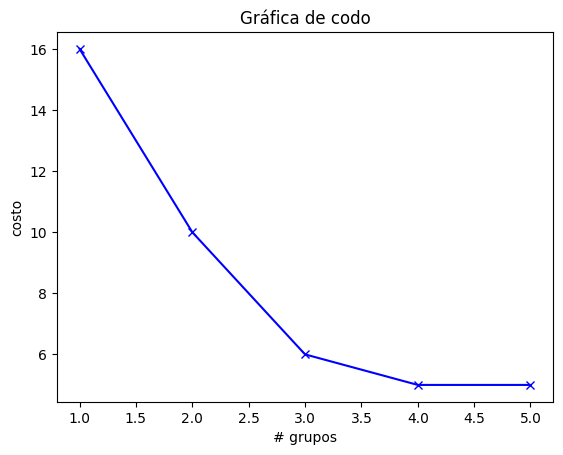

In [28]:
# Gráfica del codo
cost = []
K = range(1,6)
for num_clusters in list(K):
 kmode = KModes(n_clusters=num_clusters,init='random',n_init=5,verbose=0,random_state=42)
 kmode.fit_predict(data)
 cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('# grupos')
plt.ylabel('costo')
plt.title('Gráfica de codo')
plt.show()

In [42]:
# modelo con 3 grupos
kmode = KModes(n_clusters=3, init="random", n_init=5, verbose=False, random_state=42)
grupos = kmode.fit_predict(data)
grupos

array([0, 1, 2, 0, 1, 1, 2, 0], dtype=uint16)

In [43]:
kmode.cluster_centroids_

array([['rubio', 'café', 'lacio'],
       ['castaño', 'gris', 'chino'],
       ['pelirrojo', 'azul', 'ondulado']], dtype='<U9')

In [44]:
data.insert(0, "grupo", grupos)
data

,grupo,col_cabello,col_ojos,tipo_cabello
person,,,,
P1,0,rubio,azul,lacio
P2,1,castaño,gris,chino
P3,2,pelirrojo,verde,ondulado
P4,0,negro,café,ondulado
P5,1,castaño,azul,chino
P6,1,negro,gris,chino
P7,2,pelirrojo,azul,ondulado
P8,0,rubio,café,lacio
